NUBES DE PALABRAS

*Para una primera entrega

**Se basa una version preliminar y por lo tanto incompleta del listado de videos. 

In [ ]:
#%pip install wordcloud
#%pip install nltk

In [13]:
import os
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
from nltk.corpus import stopwords

In [14]:
# Getting the path and the file from the data raw directory
ruta_archivo = os.path.join('..', "data", "raw", "youtube_comments_with_cleaned_ts.csv")
df_base = pd.read_csv(ruta_archivo)


In [15]:
##RETOMO LAS COLUMNAS DE COMENTARIOS Y DEL CANAL.
columnas_filtradas = ['comment', 'channel_title']
df_filtrado = df_base[columnas_filtradas]

##FILTRO MAS Y ME QUEDO CON UN DF SOLO CON LOS COMENTARIOS DE "EL PELUCA MILEI"
condicion = df_filtrado['channel_title'] == 'El Peluca Milei'
df_peluca = df_filtrado[condicion]
df_peluca.head(2)

,comment,channel_title
0,Esta vieja esta más loca cómo una cabra..😂😂😂,El Peluca Milei
1,Cuanto tiempo?,El Peluca Milei


In [16]:
##Me quedo solo con los comentarios 
comentarios_peluca = df_peluca[['comment']]

##Luego convierto en string a los comentarios
comentarios_peluca = comentarios_peluca['comment'].astype('string')
comentarios_peluca = comentarios_peluca.to_string()

In [ ]:
#Cargo las stopwords
nltk.download("stopwords")
stopwords = set(stopwords.words('spanish', 'english'))

##Y tambien sumo otras
stopwords.update(["@usuario", 'usuario', 'emoji','hashtag', 'http', 'https', 'url', 'q ', 'si', 'che', 'pq', 'd', 'p', 'x', 'jajaja', 'href','youtube', 'watch', 'quot'])

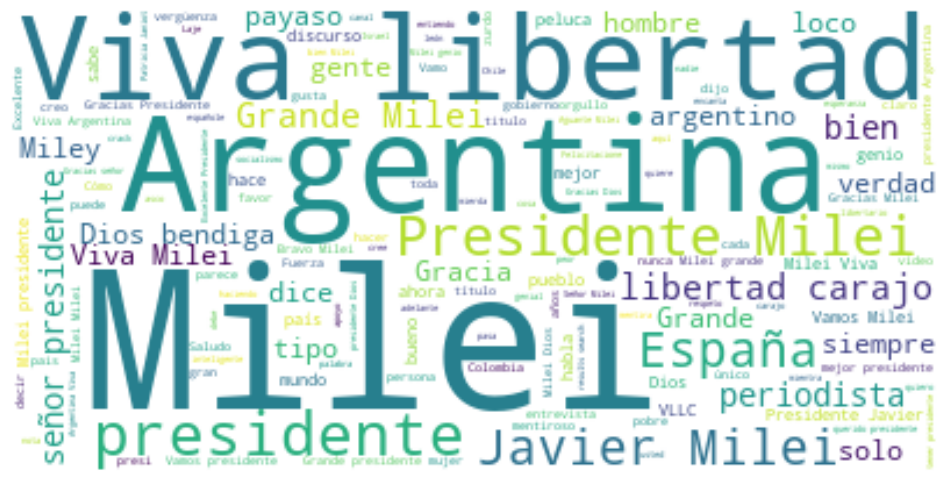

In [18]:
##PRIMERA NUBE: COMENTARIO DE "EL PELUCA MILEI"
wordcloud = WordCloud(stopwords=stopwords, background_color="white", collocation_threshold=10, min_word_length=4).generate(comentarios_peluca)
plt.figure( figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

In [19]:
##Ahora retomo el primer DF (df_filtrado) para seleccionar solo los comentarios de LA NACION
condicion = df_filtrado['channel_title'] == 'LA NACION'
df_nacion = df_filtrado[condicion]

#Me quedo solo con los comentarios
comentarios_nacion = df_nacion[['comment']]

#Los hago strings
comentarios_nacion = comentarios_nacion['comment'].astype('string')
comentarios_nacion = comentarios_nacion.to_string()

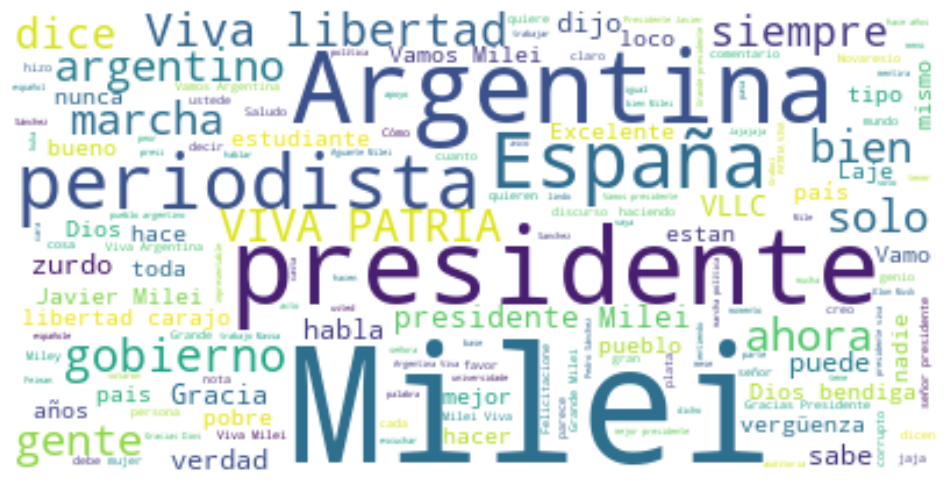

In [20]:
#NUBE DE PALABRAS DE LOS COMENTARIOS  DE LA NACION
wordcloud = WordCloud(stopwords=stopwords, background_color="white", collocation_threshold=10, min_word_length=4).generate(comentarios_nacion)
plt.figure( figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

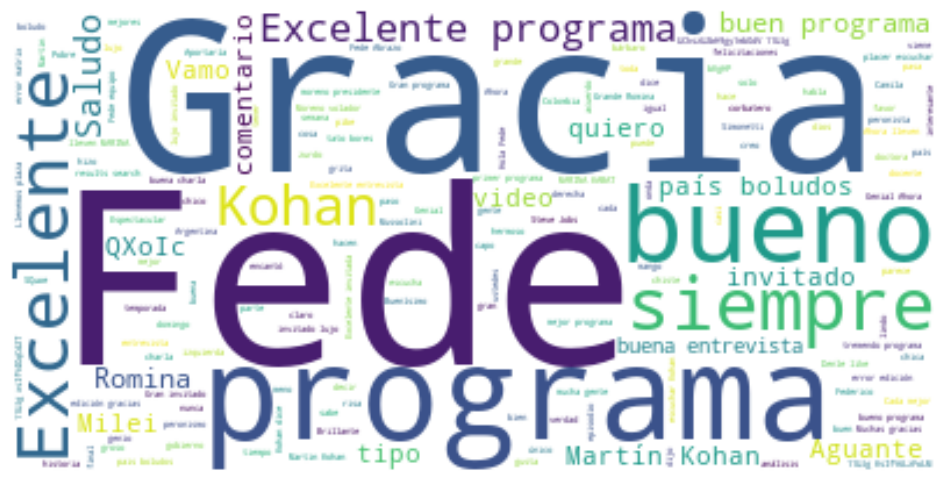

In [21]:
##REPITO PARA PAIS DE BOLUDOS

# ****PROBABLEMENTE ES LA NUBE QUE MENOS APORTA, YA QUE SON POCOS VIDEOS Y MUCHOS SE RELACIONAN MAS CON EL VIDEO (DE LARGA EXTENSION) 
#QUE CON UN EVENTO ESPECIFICO ********

condicion = df_filtrado['channel_title'] == 'Pais De Boludos'
df_pais = df_filtrado[condicion]

comentarios_pais = df_pais[['comment']]

comentarios_pais = comentarios_pais['comment'].astype('string')
comentarios_pais = comentarios_pais.to_string()

wordcloud = WordCloud(stopwords=stopwords, background_color="white", collocation_threshold=10, min_word_length=4).generate(comentarios_pais)
plt.figure( figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

In [23]:
## AHORA FILTRO PARA LOGRAR NUBES DE ALGUNOS EVENTOS
columnas_filtradas = ['comment', 'evento']
df_eventos = df_base[columnas_filtradas]
df_eventos.head(2)

,comment,evento
0,Esta vieja esta más loca cómo una cabra..😂😂😂,Primer paro nacional
1,Cuanto tiempo?,Primer paro nacional


In [24]:
df_eventos['evento'].value_counts()

Crisis diplomatica España          13617
Crisis alimentos Capital Humano    12955
Primer paro nacional               12314
Marcha federal universitaria       12284
Aprobación total Ley bases         10901
Presentación de libro               7834
24 de marzo                         4931
25 de mayo                          4091
20 de junio                         3395
Reunion con Elon Musk               2953
Inflación abril                      688
8 de marzo                           586
Name: evento, dtype: int64

In [25]:
condicion_españa = df_eventos['evento'] == 'Crisis diplomatica España'
df_españa = df_eventos[condicion_españa]
df_españa.head(2)

,comment,evento
8037,Grande Milei 🎉 una gran saludo de uan chilena ...,Crisis diplomatica España
8038,Jaja la parte de la oveja fue divertido <br>XD...,Crisis diplomatica España


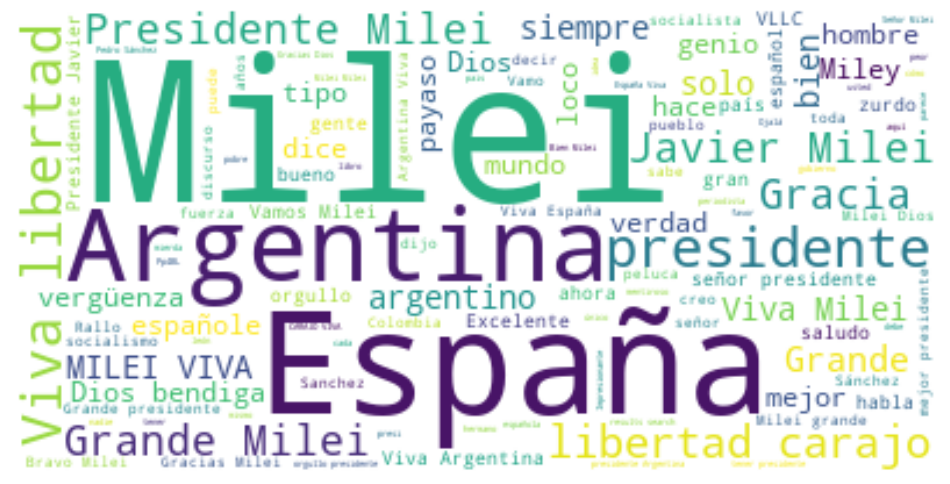

In [26]:
españa = df_españa[['comment']]

españa = españa['comment'].astype('string')
españa = españa.to_string()

wordcloud = WordCloud(stopwords=stopwords, background_color="white", collocation_threshold=10, min_word_length=4).generate(españa)
plt.figure( figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

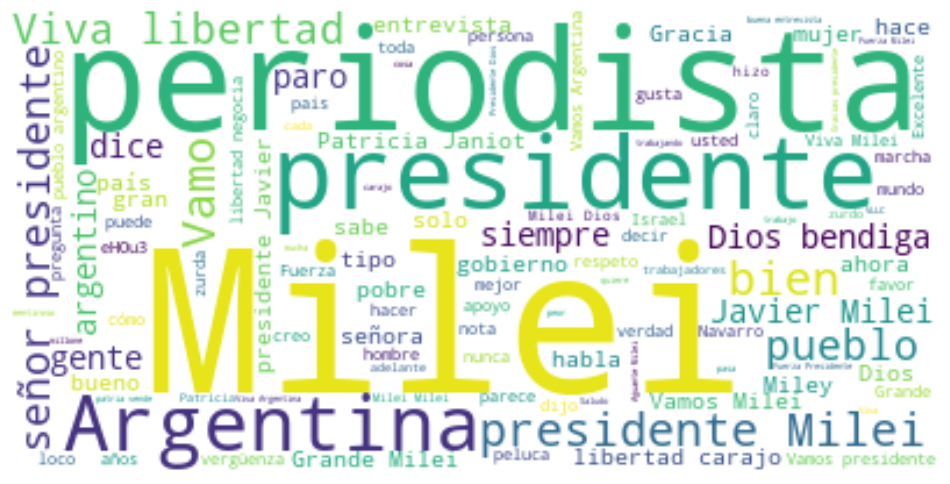

In [27]:
##Creo un df para el evento PARO 
condicion_paro = df_eventos ['evento'] == 'Primer paro nacional'
df_paro = df_eventos[condicion_paro]

#me quedo solo con los comentarios
paro = df_paro[['comment']]

#lo paso a string
paro = paro['comment'].astype('string')
paro = paro.to_string()

wordcloud = WordCloud(stopwords=stopwords, background_color="white", collocation_threshold=10, min_word_length=4).generate(paro)
plt.figure( figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

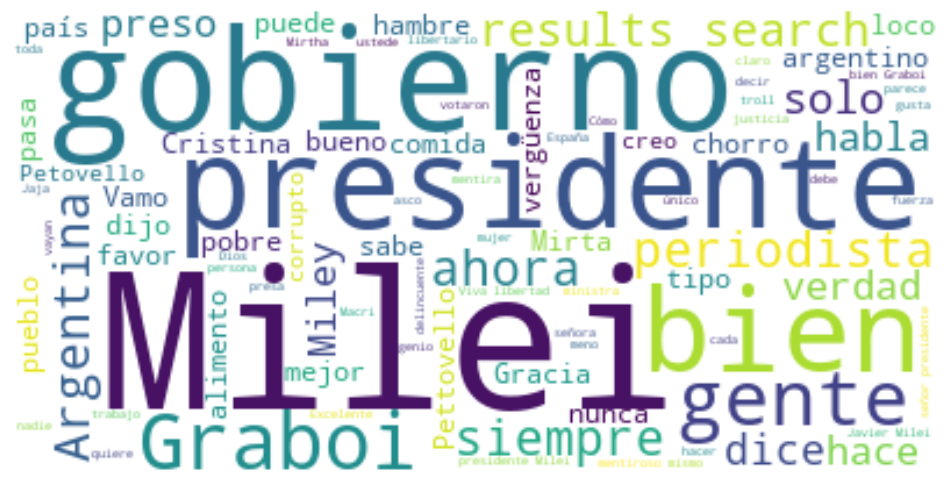

In [28]:
condicion_alimentos = df_eventos ['evento'] == 'Crisis alimentos Capital Humano'
df_alimentos = df_eventos [condicion_alimentos]

alimentos = df_alimentos[['comment']]

#lo paso a string
alimentos = alimentos['comment'].astype('string')
alimentos = alimentos.to_string()

wordcloud = WordCloud(stopwords=stopwords, background_color="white", collocation_threshold=10, min_word_length=4).generate(alimentos)
plt.figure( figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()